Suppose a disease "jeebies" is infecting a community of blobs. There are 2,500 blobs in the town, and they all have a 0.1% chance of having jeebies. The mayor insists that every blob takes a jeebies test. Like all tests it isn't perfect, but if you have jeebies it will correctly say that you have jeebies 95% of the time, and incorrectly say that you don't have jeebies 5% of the time. Also, if you do not have jeebies it will falsely say that you do have jeebies 2% of the time. The other 98% of the time, it correctly identifies that you do not have jeebies.

You test positive for jeebies! Oh no! What are the chances that you actually do have jeebies? Our intuitions want to say a high number, at least 90%, but this is very wrong! Let's simulate it to show why.

In [1]:
import random as r
import matplotlib.pyplot as plt
r.seed(1)

We're going to need some data so we can plot on a 2D graph. For each blob we'll give them a value for how much they like avocados and how much they like lattes. This data is irrelevant to the jeebies test, but it allows us to plot the data on a 2D grid.

If a blob tests positive for jeebies, they will be plotted with a "x". If positive, a "+". If they actually have jeebies they are plotted in green, or if not, red.

In [2]:
def test(jeebiesState):
    if jeebiesState == 1:
        return(1 if r.uniform(0, 1) < 0.95 else 0)
    else:
        return(0 if r.uniform(0, 1) < 0.98 else 1)

def generateIndividual():
    avocado = r.uniform(0, 1)
    latte = r.uniform(0, 1)
    jeebies = 1 if r.uniform(0, 1) < 0.001 else 0
    testResult = test(jeebies)
    return([[avocado, latte], jeebies, testResult])

population = [generateIndividual() for c in range(2500)]

Let's plot all the blobs!

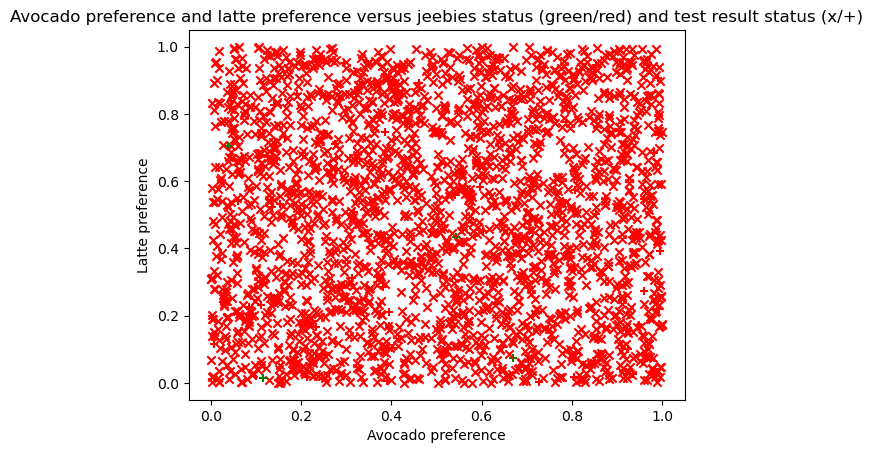

In [3]:
markers = ["x", "+"]
colors = ["Red", "Green"]
for individual in population:
    plt.scatter(individual[0][0], individual[0][1], color = colors[individual[1]], marker = markers[individual[2]])
plt.title("Avocado preference and latte preference versus jeebies status (green/red) and test result status (x/+)")
plt.xlabel("Avocado preference")
plt.ylabel("Latte preference")
plt.show()

To make it tidier, let's only plot a blob if they have jeebies or if they tested positive and do not have jeebies.

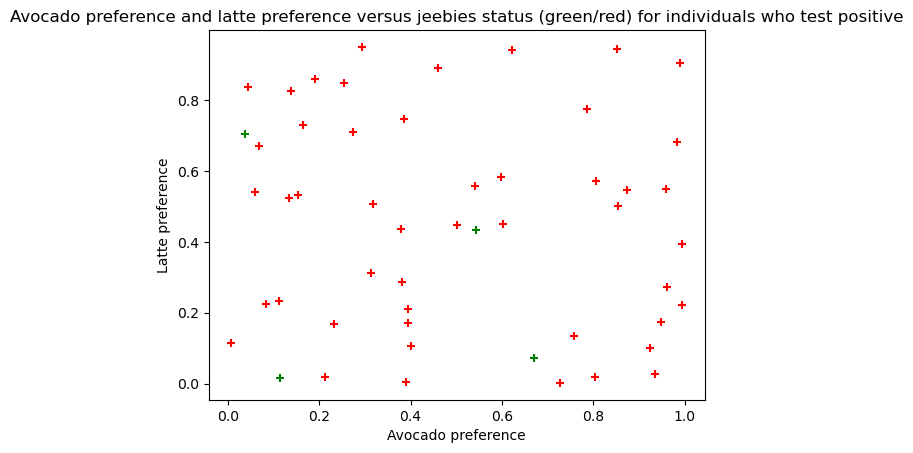

In [4]:
markers = ["x", "+"]
colors = ["Red", "Green"]
for individual in population:
    if individual[1] + individual[2] > 0:
        plt.scatter(individual[0][0], individual[0][1], color = colors[individual[1]], marker = markers[individual[2]])
plt.title("Avocado preference and latte preference versus jeebies status (green/red) for individuals who test positive")
plt.xlabel("Avocado preference")
plt.ylabel("Latte preference")
plt.show()

So what's the probability that you have jeebies given your positive test? Well it's the ratio of green + to all +! Let's calculate it from the simulation.

In [5]:
positiveTests = 0
truePositives = 0
for individual in population:
    if individual[2] == 1:
        positiveTests += 1
        if individual[1] == 1:
            truePositives += 1
print(f"So the probability you actually have jeebies given your positive test is {truePositives} / {positiveTests} = {100 * truePositives / positiveTests}%!")

So the probability you actually have jeebies given your positive test is 4 / 52 = 7.6923076923076925%!


We fallaciously thought that we were very likely to have jeebies due to the high accuracy of the test, but we committed *base rate neglect*: we ignored the fact that prior to the test we only had a 0.1% chance of having jeebies, and so given 2,500 blobs are testing and 5% of those are false positives, we are much more likely to be a false positive (one of approx. 50, which is 2% of 2,500) than a true positive (approx. 3, which is 0.01% of 2,500).

Without knowing our simulation results we should have predicted a probability of (expected true positives) / (expected true positives + expected false positives) which is 2.5 / 52.5 = 4.76%. In our simulation we happened to get 4 true positives for r.seed(1) which lead to an unusually high chance of actually being positive for jeebies, but this is due to the *small sample bias*. See the small sample bias notebook for more:-

https://github.com/DaisyWelham/Statistics-and-Data-Biases/blob/main/Small%20Sample%20Bias.ipynb